In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('C:/Users/Aayushi/Desktop/Data Science/CSV files/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Missing Data

In [3]:
df.shape

(891, 12)

In [4]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

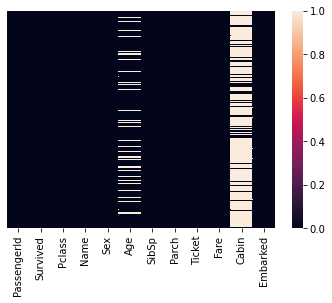

In [5]:
sns.heatmap(df.isnull(),yticklabels=False)

In [6]:
#Around 20 percent of Age Data is missing 
#Cabin column has maximum data i.e around 77 percent of data is missing 
#Embarked column has very less missing data

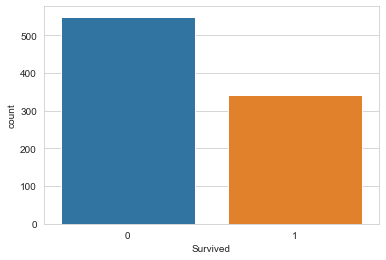

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

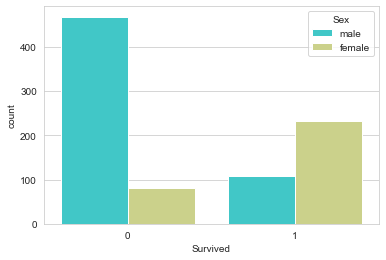

In [8]:
sns.countplot(x='Survived',hue='Sex',data=df,palette='rainbow')

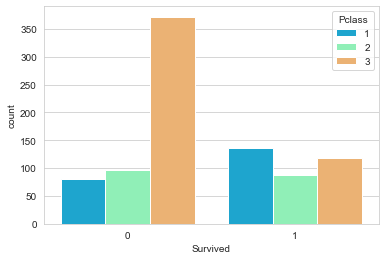

In [9]:
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

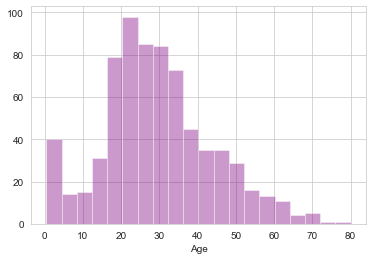

In [10]:
sns.distplot(df['Age'],kde=False,bins=20,color='Purple')  #Without dropping NaN values from Age

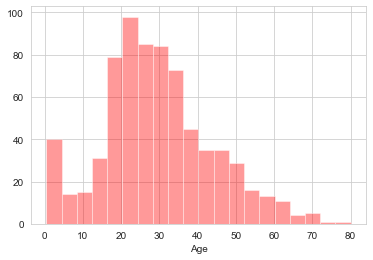

In [11]:
sns.distplot(df['Age'].dropna(),kde=False,bins=20,color='Red')  #After dropping NaN values from Age

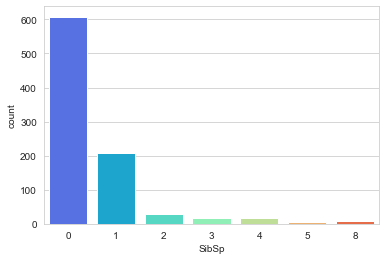

In [12]:
sns.countplot(x='SibSp',data=df,palette='rainbow')

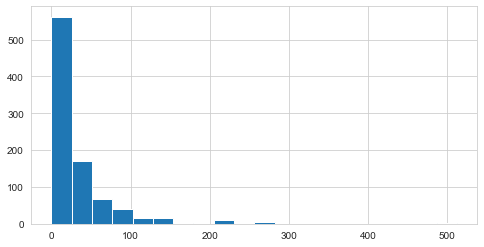

In [13]:
plt.figure(figsize=(8,4))
# sns.distplot(df['Fare'],kde=False,color='darkgreen')
df['Fare'].hist(bins=20)

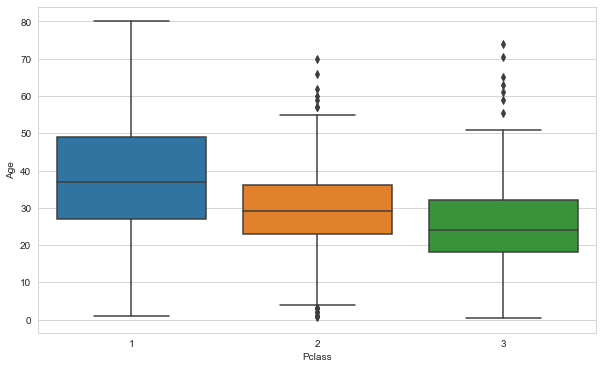

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass',y='Age',data=df)

In [15]:
# Impute the age values as per the passenger class(Pclass)

In [16]:
def impute_cols(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if df['Age'].isnull:
        if 'Pclass'==1:
            return 37
        elif 'Pclass'==2:
            return 29
        else:
            return 24
        
    else:
        return Age

In [17]:
df['Age']=df[['Age','Pclass']].apply(impute_cols,axis=1)

In [18]:
df['Age'].isnull().mean()

0.0

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,24,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,24,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,24,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,24,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,24,0,0,373450,8.0500,NaN,S


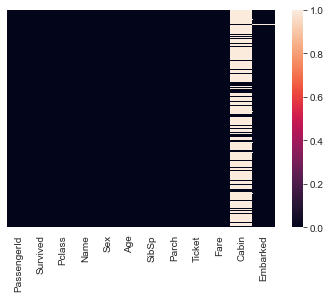

In [20]:
sns.heatmap(df.isnull(),yticklabels=False)

In [21]:
#Cabin contains more than 77percent of values as Nan hence this column can be dropped 

In [22]:
df.drop(['Cabin'],axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,24,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,24,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,24,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,24,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,24,0,0,373450,8.0500,S


In [23]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
embark=pd.get_dummies(df['Embarked'],drop_first=True)      #drop_first is dummy variable Trap 

In [24]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [25]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,24,1,0,7.2500
1,2,1,1,24,1,0,71.2833
2,3,1,3,24,0,0,7.9250
3,4,1,1,24,1,0,53.1000
4,5,0,3,24,0,0,8.0500


In [26]:
df=pd.concat([df,sex,embark],axis=1)

# This data is now ready for modelling 


In [27]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,24,1,0,7.2500,1,0,1
1,2,1,1,24,1,0,71.2833,0,0,0
2,3,1,3,24,0,0,7.9250,0,0,1
3,4,1,1,24,1,0,53.1000,0,0,1
4,5,0,3,24,0,0,8.0500,1,0,1


In [28]:
x=df.drop(['Survived'],axis=1)
y=df[['Survived']]

# Train Test Split

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [42]:
y_train.mean()

Survived    0.370787
dtype: float64

In [43]:
y_test.mean()

Survived    0.414179
dtype: float64

In [44]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [45]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [46]:
clf.score(X_test,y_test)

0.7686567164179104